<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li><li><span><a href="#Regular-Profit" data-toc-modified-id="Regular-Profit-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Regular Profit</a></span></li><li><span><a href="#Charging-Stations" data-toc-modified-id="Charging-Stations-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Charging Stations</a></span></li></ul></li><li><span><a href="#Baseline-Charging" data-toc-modified-id="Baseline-Charging-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Baseline Charging</a></span></li><li><span><a href="#Intraday" data-toc-modified-id="Intraday-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intraday</a></span><ul class="toc-item"><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Risk-Averse-(r=0.3,-acc=90)" data-toc-modified-id="Risk-Averse-(r=0.3,-acc=90)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Risk Averse (r=0.3, acc=90)</a></span></li></ul></li><li><span><a href="#Balancing" data-toc-modified-id="Balancing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Balancing</a></span><ul class="toc-item"><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Risk-Averse-(r=0.5,-acc=70)" data-toc-modified-id="Risk-Averse-(r=0.5,-acc=70)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Risk Averse (r=0.5, acc=70)</a></span></li></ul></li><li><span><a href="#Integrated" data-toc-modified-id="Integrated-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Integrated</a></span><ul class="toc-item"><li><span><a href="#Risk-Averse-(r=0.5,0.3,-acc=70,90)" data-toc-modified-id="Risk-Averse-(r=0.5,0.3,-acc=70,90)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Risk Averse (r=0.5,0.3, acc=70,90)</a></span></li><li><span><a href="#Risk-Seeking-(r=0.2,0.00,-acc=70,90)" data-toc-modified-id="Risk-Seeking-(r=0.2,0.00,-acc=70,90)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Risk Seeking (r=0.2,0.00, acc=70,90)</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Style" data-toc-modified-id="Style-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Style</a></span></li><li><span><a href="#Fleet-Utilization" data-toc-modified-id="Fleet-Utilization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fleet Utilization</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [3]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [13]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load

In [14]:
pd.set_option('display.float_format', '{:.4f}'.format)

start = "2016-06-01"
end = "2018-01-01"

def read_results(path):
    df = pd.read_csv(path)
    df["timestamp"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
    df = df.set_index("timestamp") 
    df = df[start:end]
    return df

## Regular Profit

In [15]:
df_car2go = pd.read_pickle("../data/processed/trips_big.pkl")
df_car2go["end_time"] = df_car2go["end_time"].apply(lambda x : datetime.fromtimestamp(x))
df_car2go = df_car2go.set_index("end_time")
df_car2go = df_car2go[start:end]
df_car2go["trip_price"].sum()/1000

17707.869599999995

## Charging Stations

In [17]:
df_c = df_car2go.loc[df_car2go["end_charging"] == 1, ["end_lat", "end_lon"]].round(3)
df_c["stations"] = df_c["end_lat"].astype(str) + ";" + df_c["end_lon"].astype(str)
len(df_c["stations"].unique())

1858

# Baseline Charging

In [11]:
df = read_results("../results/baseline.csv")
df.sum()/1000

charged_regular_kwh   2080.49
charged_vpp_kwh          0.00
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur               0.00
dtype: float64

# Intraday

## Benchmark

In [4]:
df_i = read_results("../results/intraday-benchmark.csv")
df_i.sum()/1000

charged_regular_kwh    619.10
charged_vpp_kwh       1461.39
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur              65.62
dtype: float64

## Risk Averse (r=0.3, acc=90)

In [5]:
df_i = read_results("../results/intraday-risk-averse.csv")
df_i.sum()/1000

charged_regular_kwh   1095.85
charged_vpp_kwh        984.64
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur              45.08
dtype: float64

# Balancing

## Benchmark

In [6]:
df_b = read_results("../results/balancing-benchmark.csv")
df_b.sum()/1000

charged_regular_kwh    62.73
charged_vpp_kwh       302.72
imbalance_kwh           0.00
lost_rentals_eur        0.20
lost_rentals_nb         0.00
profit_eur             16.46
dtype: float64

## Risk Averse (r=0.5, acc=70)

In [7]:
df_b = read_results("../results/balancing-risk-averse.csv")
df_b.sum()/1000

charged_regular_kwh   1277.93
charged_vpp_kwh        802.56
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur              43.62
dtype: float64

# Integrated

In [21]:
df_in = read_results("../results/integrated-benchmark-acc-1.csv")
df_in.sum()/1000

charged_regular_kwh    607.7925
charged_vpp_kwh       1472.6970
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              77.3565
dtype: float64

## Risk Averse (r=0.5,0.3, acc=70,90)

In [20]:
df_in = read_results("../results/integrated-risk-averse.csv")
df_in.sum()/1000

charged_regular_kwh    788.5719
charged_vpp_kwh       1291.9176
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              67.0389
dtype: float64

## Risk Seeking (r=0.2,0.00, acc=70,90)

In [9]:
df_in = read_results("../results/integrated-risk-seeking.csv")
df_in.sum()/1000

charged_regular_kwh    400.8096
charged_vpp_kwh       1681.9659
imbalance_kwh            1.0224
lost_rentals_eur        15.4680
lost_rentals_nb          1.2370
profit_eur              87.9834
dtype: float64

# Plots

## Style

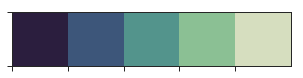

In [9]:
sns.set(rc={'figure.figsize':(10,6)})

sns.set_context("paper", font_scale=1.3)

sns.set_style("white")
sns.set_style("ticks")


palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)
sns.set_palette(palette)

sns.palplot(palette)

## Fleet Utilization

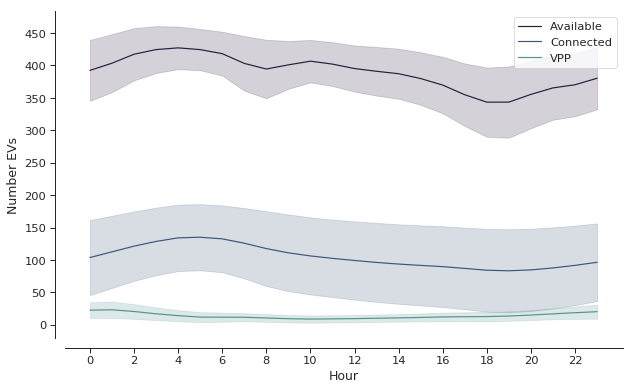

In [10]:
df_stats = read_results("../results/stats-baseline.csv")
df_stats["hour"] = df_stats.index.hour
df_stats.head()

def labels(y):
    label = y.split("_")[0].title()
    label = "Connected" if label == "Charging" else label
    label = label.upper() if label == "Vpp" else label
    return label

Y = ["available_evs", "charging_evs", "vpp_evs"]
for y in Y:
    ax = sns.lineplot(x="hour", y=y, ci="sd", data=df_stats, label=labels(y))
    
sns.despine(offset=10)
ax.set(xlabel='Hour', ylabel='Number EVs')
plt.xticks(np.arange(0, 24, 2));
plt.yticks(np.arange(0, 500, 50));
plt.savefig("../results/fig/fleet-utilization.png")